# Polynomial Regression

Polynomial regression is a form of Linear regression where only due to the Non-linear relationship between dependent and independent variables we add some polynomial terms to linear regression to convert it into Polynomial regression.
The equation:

$ y = a0 + a1x1 + a2x12 + … + anx1n $

The degree of order which to use is a Hyperparameter, and we need to choose it wisely. But using a high degree of polynomial tries to overfit the data and for smaller values of degree, the model tries to underfit so we need to find the optimum value of a degree.

## Import & Install Libraries

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
%matplotlib inline

In [19]:
df=pd.read_csv('Real estate.csv')

## Exploratory Data Analysis (EDA)

In [20]:
df.shape

(414, 8)

In [21]:
df.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   No                                      414 non-null    int64  
 1   X1 transaction date                     414 non-null    float64
 2   X2 house age                            414 non-null    float64
 3   X3 distance to the nearest MRT station  414 non-null    float64
 4   X4 number of convenience stores         414 non-null    int64  
 5   X5 latitude                             414 non-null    float64
 6   X6 longitude                            414 non-null    float64
 7   Y house price of unit area              414 non-null    float64
dtypes: float64(6), int64(2)
memory usage: 26.0 KB


In [23]:
df.columns

Index(['No', 'X1 transaction date', 'X2 house age',
       'X3 distance to the nearest MRT station',
       'X4 number of convenience stores', 'X5 latitude', 'X6 longitude',
       'Y house price of unit area'],
      dtype='object')

In [24]:
# Rename the columns (remove X1..X2..X3.. and Y)
df.columns = ['No','transaction date', 'house age', 'distance to the nearest MRT station', 'number of convenience stores', 'latitude', 'longitude', 'house price of unit area']
df.head()

,No,transaction date,house age,distance to the nearest MRT station,number of convenience stores,latitude,longitude,house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


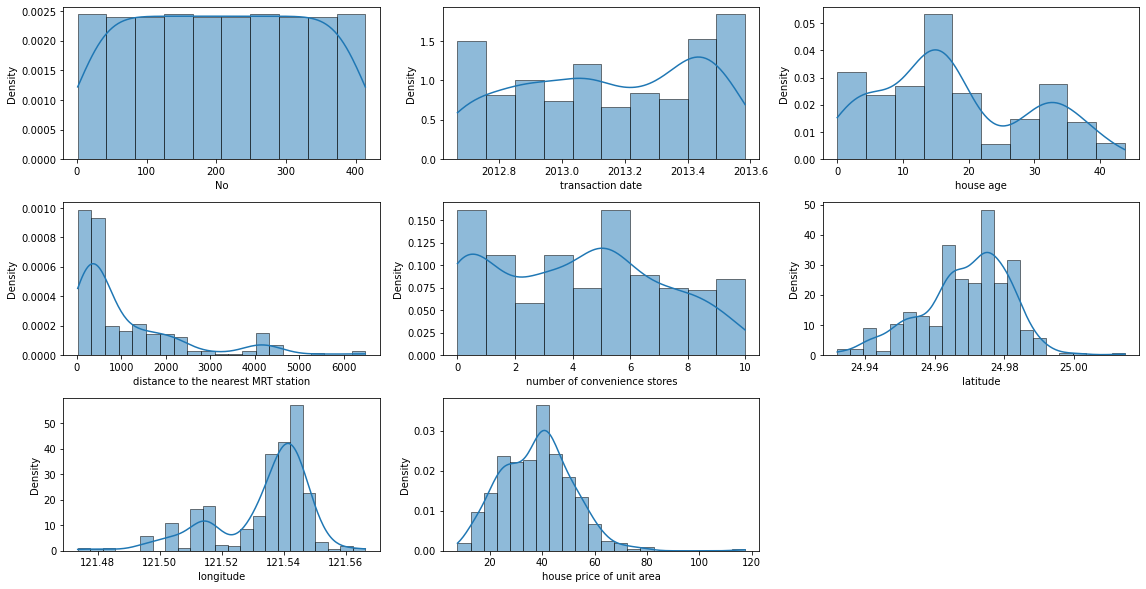

In [25]:
# Histograms
fig = plt.figure(figsize=(16,16))
for index,col in enumerate(df):
    plt.subplot(6,3,index+1)
    sns.histplot(df.loc[:,col].dropna(), kde=True, stat="density", linewidth=0.5);
fig.tight_layout(pad=1.0);

Most of house price are between 20 to 50.
Most of house age are 15.
Most of house are near MRT. Most of them not more than 500.

In [26]:
df.head()

,No,transaction date,house age,distance to the nearest MRT station,number of convenience stores,latitude,longitude,house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


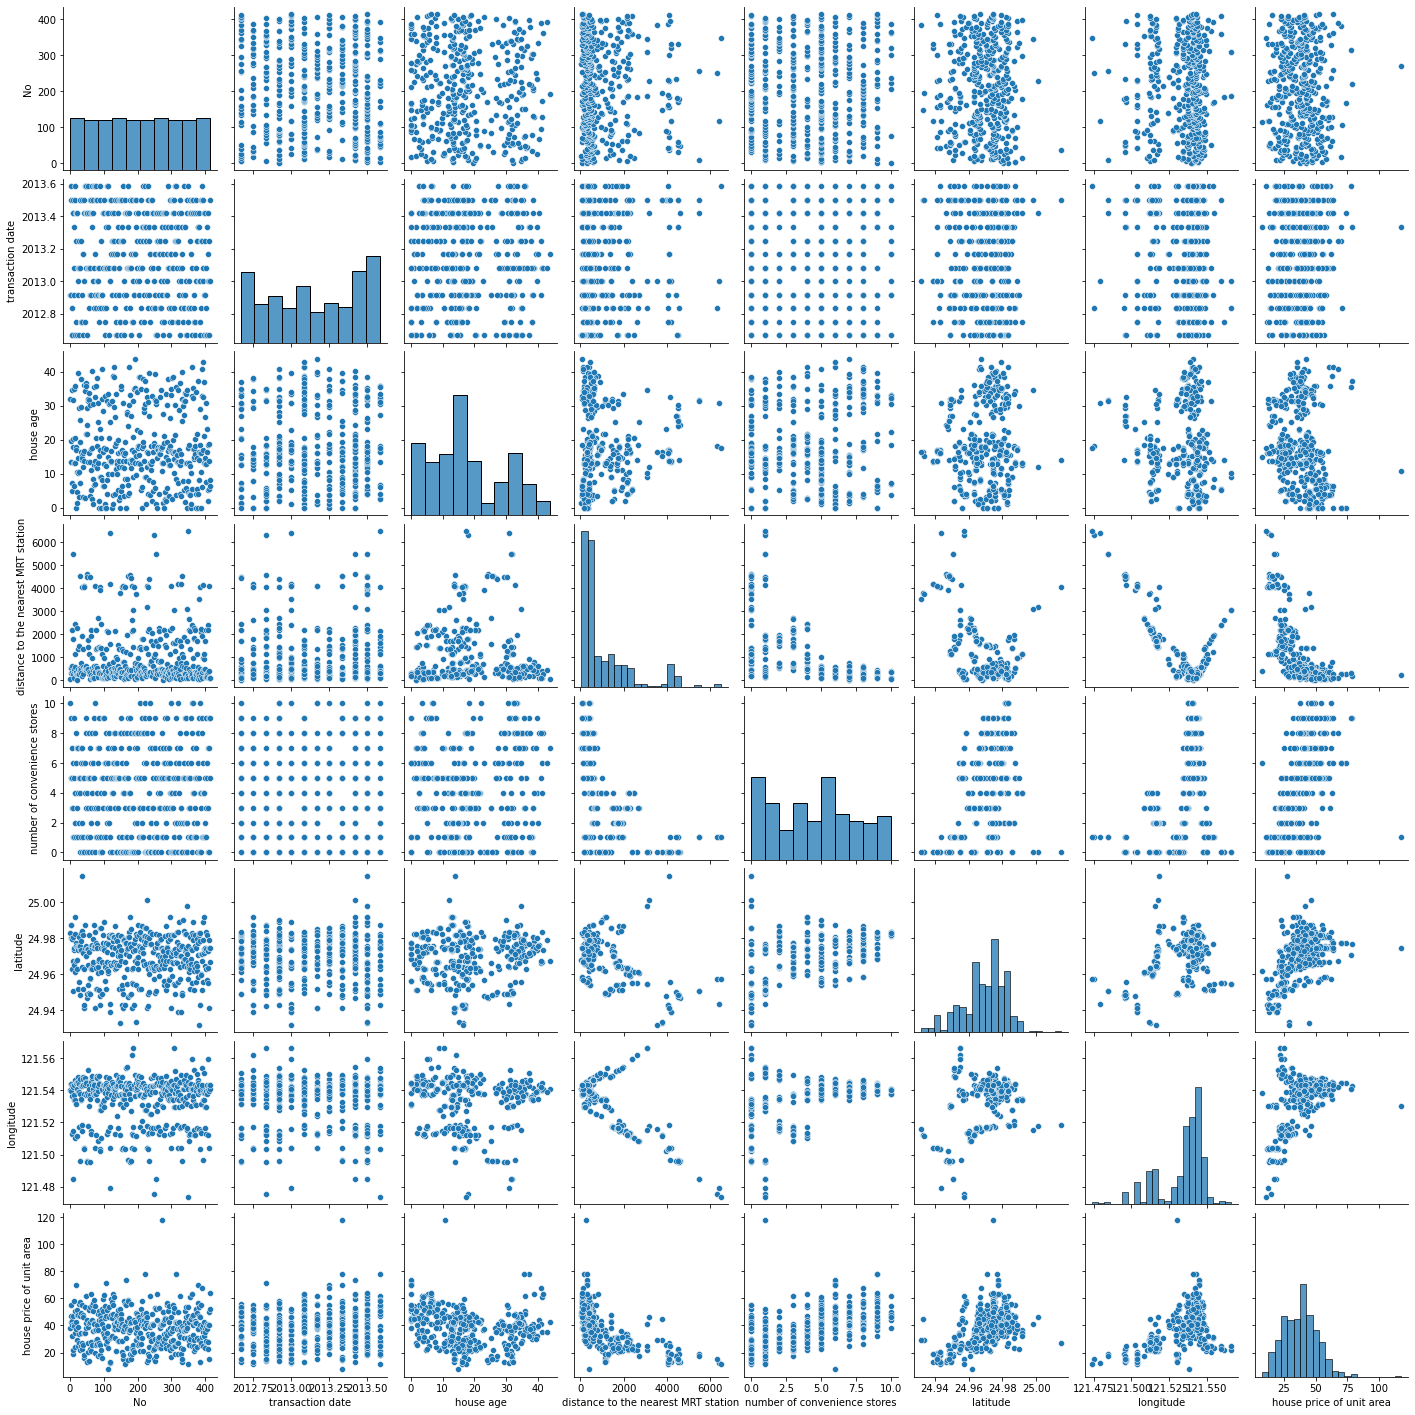

In [27]:
sns.pairplot(df)

In [28]:
df.corr()

,No,transaction date,house age,distance to the nearest MRT station,number of convenience stores,latitude,longitude,house price of unit area
No,1.000000,-0.048658,-0.032808,-0.013573,-0.012699,-0.010110,-0.011059,-0.028587
transaction date,-0.048658,1.000000,0.017549,0.060880,0.009635,0.035058,-0.041082,0.087491
house age,-0.032808,0.017549,1.000000,0.025622,0.049593,0.054420,-0.048520,-0.210567
distance to the nearest MRT station,-0.013573,0.060880,0.025622,1.000000,-0.602519,-0.591067,-0.806317,-0.673613
number of convenience stores,-0.012699,0.009635,0.049593,-0.602519,1.000000,0.444143,0.449099,0.571005
latitude,-0.010110,0.035058,0.054420,-0.591067,0.444143,1.000000,0.412924,0.546307
longitude,-0.011059,-0.041082,-0.048520,-0.806317,0.449099,0.412924,1.000000,0.523287
house price of unit area,-0.028587,0.087491,-0.210567,-0.673613,0.571005,0.546307,0.523287,1.000000


<AxesSubplot:>

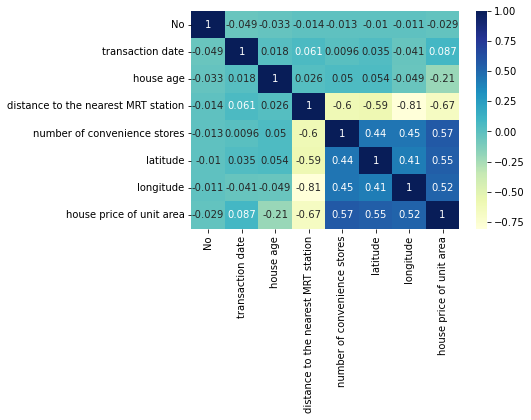

In [29]:
sns.heatmap(df.corr(), annot=True,cmap='YlGnBu')

### Define X and y

In [30]:
X=df.drop('house price of unit area', axis=1) 
y=df['house price of unit area']

## Polynomial Features


In [31]:
from sklearn.preprocessing import PolynomialFeatures
polynomial_converter= PolynomialFeatures(degree=2, include_bias=False)
poly_features=polynomial_converter.fit_transform(X)
poly_features.shape

(414, 35)

In [32]:
poly_features

array([[1.00000000e+00, 2.01291700e+03, 3.20000000e+01, ...,
        6.24149290e+02, 3.03643739e+03, 1.47720299e+04],
       [2.00000000e+00, 2.01291700e+03, 1.95000000e+01, ...,
        6.24017387e+02, 3.03609828e+03, 1.47718525e+04],
       [3.00000000e+00, 2.01358300e+03, 1.33000000e+01, ...,
        6.24373157e+02, 3.03707359e+03, 1.47729221e+04],
       ...,
       [4.12000000e+02, 2.01325000e+03, 1.88000000e+01, ...,
        6.23961931e+02, 3.03597212e+03, 1.47719376e+04],
       [4.13000000e+02, 2.01300000e+03, 8.10000000e+00, ...,
        6.23338106e+02, 3.03447431e+03, 1.47721345e+04],
       [4.14000000e+02, 2.01350000e+03, 6.50000000e+00, ...,
        6.23717159e+02, 3.03545749e+03, 1.47727252e+04]])

In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=101)

## Feature Scaling

In [34]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
scaler.fit(X_train)
X_train= scaler.transform(X_train)
X_test= scaler.transform(X_test)

## Training a Polynomial Regression Model

In [35]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV, LinearRegression

In [36]:
polymodel=LinearRegression()

In [37]:
polymodel.fit(X_train, y_train)

LinearRegression()

In [38]:
y_pred=polymodel.predict(X_test)

In [39]:
pd.DataFrame({'Y_Test': y_test,'Y_Pred':y_pred, 'Residuals':(y_test-y_pred) }).head()

,Y_Test,Y_Pred,Residuals
176,19.2,16.299461,2.900539
347,11.2,4.339573,6.860427
307,24.7,17.169854,7.530146
299,46.1,47.167879,-1.067879
391,31.3,27.277706,4.022294


In [40]:
from sklearn import metrics

In [41]:
R2_Poly= metrics.r2_score(y_test, y_pred)
MAE_Poly = metrics.mean_absolute_error(y_test,y_pred)
MSE_Poly = metrics.mean_squared_error(y_test,y_pred)
RMSE_Poly = np.sqrt(MSE_Poly)

pd.DataFrame([R2_Poly,MAE_Poly, MSE_Poly, RMSE_Poly],
             index=['R2','MAE', 'MSE', 'RMSE'], columns=['metrics'])

,metrics
R2,0.754475
MAE,4.493887
MSE,32.501734
RMSE,5.701029


# Compare to the simple linear regression

In [42]:
XS_train, XS_test, ys_train, ys_test = train_test_split(X, y, test_size=0.3, random_state=101)
simplemodel=LinearRegression()
simplemodel.fit(XS_train, ys_train)
ys_pred=simplemodel.predict(XS_test)

R2_simple= metrics.r2_score(ys_test, ys_pred)
MAE_simple = metrics.mean_absolute_error(ys_test,ys_pred)
MSE_simple = metrics.mean_squared_error(ys_test,ys_pred)
RMSE_simple = np.sqrt(MSE_simple)

In [43]:
pd.DataFrame({'Poly Metrics': [R2_Poly, MAE_Poly, MSE_Poly, RMSE_Poly], 'Simple Metrics':[R2_simple, MAE_simple, MSE_simple,
                                                                                 RMSE_simple]}, index=['R2','MAE', 'MSE', 'RMSE'])

,Poly Metrics,Simple Metrics
R2,0.754475,0.653410
MAE,4.493887,5.373025
MSE,32.501734,45.880307
RMSE,5.701029,6.773500


Regularizations are techniques used to reduce the error by fitting a function appropriately on the given training set and avoid overfitting. 
* For regression problems, the increase in flexibility of a model is represented by an increase in its coefficients, which are calculated from the regression line.


## Ridge Regression

Ridge regression is one of the types of linear regression in which we introduce a small amount of bias, known as Ridge regression penalty so that we can get better long-term predictions.
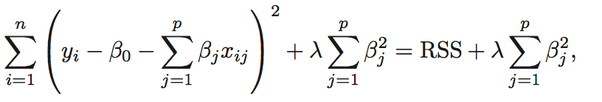

Performs L2 regularization, i.e. adds penalty equivalent to square of the magnitude of coefficients


In [44]:
from sklearn.linear_model import Ridge
ridge_model= Ridge(alpha=0.5)
ridge_model.fit(X_train, y_train)

Ridge(alpha=0.5)

In [45]:
y_pred_ridge= ridge_model.predict(X_test)

In [46]:
#considering fitness metrics

R2 = metrics.r2_score(y_test, y_pred_ridge)
MAE= metrics.mean_absolute_error(y_test, y_pred_ridge)
MSE= metrics.mean_squared_error(y_test, y_pred_ridge)
RMSE= np.sqrt(MSE)
pd.DataFrame([R2, MAE, MSE, RMSE], index=['R2', 'MAE', 'MSE', 'RMSE'], columns=['metrics for Ridge alpha=0.5'])

,metrics for Ridge alpha=0.5
R2,0.770647
MAE,4.347433
MSE,30.360917
RMSE,5.510074


###  Ridge Regression (Choosing an alpha value with Cross-Validation)


In [47]:
from sklearn.linear_model import RidgeCV
ridge_cv_model=RidgeCV(alphas=(0.1, 1.0, 10.0), scoring='neg_mean_absolute_error')
ridge_cv_model.fit(X_train, y_train)
ridge_cv_model.alpha_

10.0

In [48]:
#predicting y_test after training the model and considering fitness metrics

y_pred_ridge_cv = ridge_cv_model.predict(X_test)
R2_ridge_cv = metrics.r2_score(y_test, y_pred_ridge_cv)
MAE_ridge_cv= metrics.mean_absolute_error(y_test, y_pred_ridge_cv)
MSE_ridge_cv= metrics.mean_squared_error(y_test, y_pred_ridge_cv)
RMSE_ridge_cv= np.sqrt(MSE_ridge_cv)
pd.DataFrame([R2_ridge_cv, MAE_ridge_cv,MSE_ridge_cv,RMSE_ridge_cv], index=['R2', 'MAE', 'MSE', 'RMSE'], columns=['metrics for Ridge alpha=10'])

,metrics for Ridge alpha=10
R2,0.775788
MAE,4.411224
MSE,29.680374
RMSE,5.447970


In [49]:
# considering coefficient
ridge_cv_model.coef_

array([-0.38046898,  0.57658081, -2.56159947, -2.04562801,  1.05060525,
        0.95050421, -0.4203773 ,  0.6522258 , -0.37928288,  1.21603689,
        0.07627595, -0.04123901, -0.38536275, -0.38153943,  0.5770563 ,
       -2.56022209, -2.04708321,  1.05121885,  1.05580354,  0.15005582,
        5.42454785,  1.19528376,  1.0573944 , -2.56407023, -2.56210876,
        3.32333306, -2.82819616, -2.06628207, -2.04819783, -0.92619636,
        1.04983047,  1.05165386,  0.94833919,  0.74800594, -0.42011528])

## Lasso Regression


Lasso regression is another variant of the regularization technique used to reduce the complexity of the model. It stands for Least Absolute and Selection Operator.

It is similar to the Ridge Regression except that the penalty term includes the absolute weights instead of a square of weights.
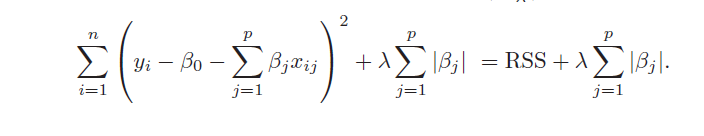
Performs L1 regularization, i.e. adds penalty equivalent to absolute value of the magnitude of coefficients

In [50]:
from sklearn.linear_model import LassoCV
lasso_cv_model= LassoCV(eps=0.01, n_alphas=100, cv=5,max_iter=10000, tol=0.0001)
lasso_cv_model.fit(X_train, y_train)
lasso_cv_model.alpha_

0.12504222868471876

In [51]:
#predicting y_test after training the model and considering fitness metrics

y_pred_lasso= lasso_cv_model.predict(X_test)

In [52]:

R2_Lasso_cv = metrics.r2_score(y_test, y_pred_lasso)
MAE_Lasso_cv= metrics.mean_absolute_error(y_test, y_pred_lasso)
MSE_Lasso_cv= metrics.mean_squared_error(y_test, y_pred_lasso)
RMSE_Lasso_cv= np.sqrt(MSE_Lasso_cv)
pd.DataFrame([R2_Lasso_cv, MAE_Lasso_cv,MSE_Lasso_cv,RMSE_Lasso_cv], index=['R2', 'MAE', 'MSE', 'RMSE'], columns=['metrics for LassoCV alpha=0.12'])

,metrics for LassoCV alpha=0.12
R2,0.767909
MAE,4.453898
MSE,30.723386
RMSE,5.542868


In [53]:
lasso_cv_model.coef_

array([-0.        ,  0.        , -2.5309011 , -0.        ,  3.22690032,
        0.        , -0.        , -0.        , -0.        ,  0.        ,
       -0.        , -0.        , -0.05553982, -0.        ,  0.44100849,
       -0.        , -1.27384759,  0.39586124,  3.74300887,  0.        ,
        5.99544607,  0.        ,  0.1630546 , -6.44430811, -0.        ,
        3.56742493, -2.45255316, -5.78268244, -0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        , -0.        ])

# ElasticNet

The Elastic-Net is a regularised regression method that linearly combines both penalties i.e. L1 and L2 of the Lasso and Ridge regression methods. It is useful when there are multiple correlated features. The difference between Lass and Elastic-Net lies in the fact that Lasso is likely to pick one of these features at random while elastic-net is likely to pick both at once.

In [54]:
from sklearn.linear_model import ElasticNetCV
elastic_model= ElasticNetCV(l1_ratio=[0.1, 0.5, 0.7, 0.9, 0.95, 0.99, 1],cv=5, max_iter=100000)
elastic_model.fit(X_train, y_train)
elastic_model.l1_ratio_

0.99

In [55]:
y_pred_elastic=elastic_model.predict(X_test)

In [56]:
R2_Elastic = metrics.r2_score(y_test, y_pred_elastic)
MAE_Elastic= metrics.mean_absolute_error(y_test, y_pred_elastic)
MSE_Elastic= metrics.mean_squared_error(y_test, y_pred_elastic)
RMSE_Elastic= np.sqrt(MSE_Elastic)
pd.DataFrame([R2_Elastic, MAE_Elastic,MSE_Elastic,RMSE_Elastic], index=['R2','MAE', 'MSE', 'RMSE'], columns=['metrics for ElasticCV l1=0.99'])

,metrics for ElasticCV l1=0.99
R2,0.767909
MAE,4.454991
MSE,30.723353
RMSE,5.542865


In [57]:
data = {'Metrics': [R2_simple,MAE_simple,MSE_simple, RMSE_simple,R2_Poly,MAE_Poly,MSE_Poly, RMSE_Poly, R2_ridge_cv, MAE_ridge_cv,MSE_ridge_cv,RMSE_ridge_cv,R2_Lasso_cv, MAE_Lasso_cv,MSE_Lasso_cv,RMSE_Lasso_cv,R2_Elastic,MAE_Elastic,MSE_Elastic, RMSE_Elastic], 'Model': ['LR','LR','LR','LR','PR','PR','PR','PR','RidgeCV','RidgeCV','RidgeCV','RidgeCV','LassoCV','LassoCV','LassoCV','LassoCV','ElasticNetCV','ElasticNetCV','ElasticNetCV','ElasticNetCV']}

pd.DataFrame(data, index=['R2','MAE', 'MSE', 'RMSE','R2','MAE', 'MSE', 'RMSE','R2','MAE', 'MSE', 'RMSE','R2','MAE', 'MSE', 'RMSE', 'R2','MAE', 'MSE', 'RMSE'])

,Metrics,Model
R2,0.653410,LR
MAE,5.373025,LR
MSE,45.880307,LR
RMSE,6.773500,LR
R2,0.754475,PR
MAE,4.493887,PR
MSE,32.501734,PR
RMSE,5.701029,PR
R2,0.775788,RidgeCV
MAE,4.411224,RidgeCV


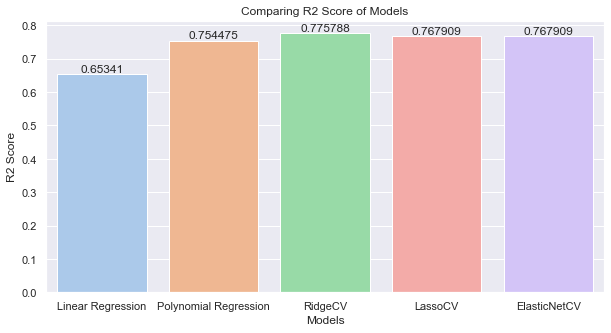

In [94]:
sns.set()
plt.figure(figsize=(10,5))

models = ['Linear Regression','Polynomial Regression', 'RidgeCV', 'LassoCV', 'ElasticNetCV']
r2 = [R2_simple, R2_Poly, R2_ridge_cv, R2_Lasso_cv, R2_Elastic ]
ax = sns.barplot(x = models, y = r2, palette='pastel')
ax.bar_label(ax.containers[0])
plt.xlabel('Models')
plt.ylabel('R2 Score')
plt.title('Comparing R2 Score of Models');

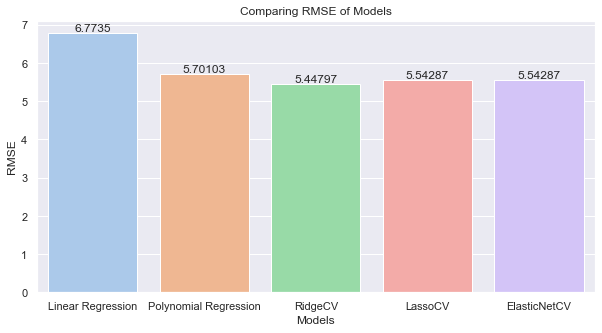

In [93]:
sns.set()
plt.figure(figsize=(10,5))
rmse = [RMSE_simple, RMSE_Poly, RMSE_ridge_cv, RMSE_Lasso_cv, RMSE_Elastic]
ax = sns.barplot(x = models, y = rmse, palette = 'pastel')
ax.bar_label(ax.containers[0])
plt.xlabel('Models')
plt.ylabel('RMSE')
plt.title('Comparing RMSE of Models');

In [60]:
test_residuals_linear=ys_test-ys_pred
test_residuals_poly =y_test-y_pred
test_residuals_ridge =y_test-y_pred_ridge
test_residuals_lasso =y_test-y_pred_lasso
test_residuals_elastic =y_test-y_pred_elastic


Text(0.5, 1.0, 'Linear Regression')

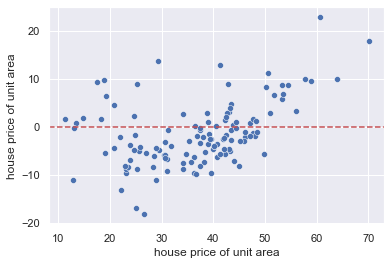

In [83]:
plt.axhline(y=0, color='r', ls='--')
sns.scatterplot(x=y_test, y=test_residuals_linear)
ax[0].set_title("Linear Regression")


Text(0.5, 1.0, 'Polynimonal Regression')

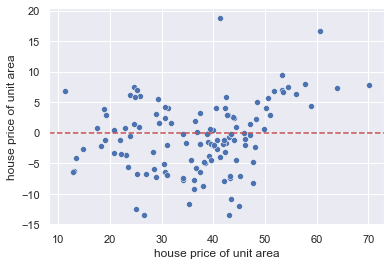

In [87]:
plt.axhline(y=0, color='r', ls='--')
sns.scatterplot(x=y_test, y=test_residuals_poly)
ax[0].set_title("Polynimonal Regression")


Text(0.5, 1.0, 'Ridge Regression')

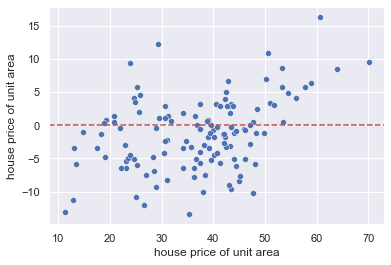

In [88]:
plt.axhline(y=0, color='r', ls='--')
sns.scatterplot(x=y_test, y=test_residuals_ridge)
ax[0].set_title("Ridge Regression")


Text(0.5, 1.0, 'Lasso Regressions')

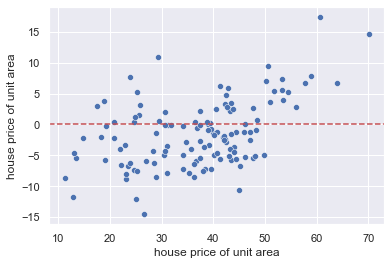

In [89]:
plt.axhline(y=0, color='r', ls='--')
sns.scatterplot(x=y_test, y=test_residuals_lasso)
ax[0].set_title("Lasso Regressions")


Text(0.5, 1.0, 'ElasticNet')

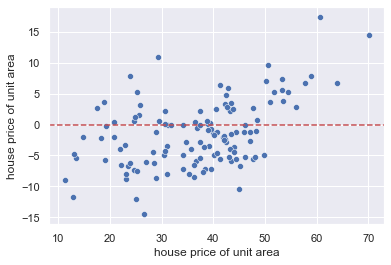

In [90]:
plt.axhline(y=0, color='r', ls='--')
sns.scatterplot(x=y_test, y=test_residuals_elastic)
ax[0].set_title("ElasticNet")
